In [5]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np

rec = wfdb.rdrecord("EEG/106")
ann = wfdb.rdann("EEG/106", "atr")

print("fs:", rec.fs)
print("channels:", rec.sig_name)
print("num annotations:", len(ann.sample))
print("first 10 symbols:", ann.symbol[:10])


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": [
        "Times New Roman",   # 如果存在，优先
        "Liberation Serif",  # Ubuntu / Debian 常见
        "Nimbus Roman",      # TeX / Ghostscript 常见
        "DejaVu Serif"       # Matplotlib 默认兜底
    ],
    "mathtext.fontset": "stix",       # 数学符号更像 Times
    "axes.unicode_minus": False,
})

fs: 360
channels: ['MLII', 'V1']
num annotations: 2098
first 10 symbols: ['~', '+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


In [6]:
pvc_idx = [s for s, sym in zip(ann.sample, ann.symbol) if sym == 'V']
print("PVC count:", len(pvc_idx))

PVC count: 520


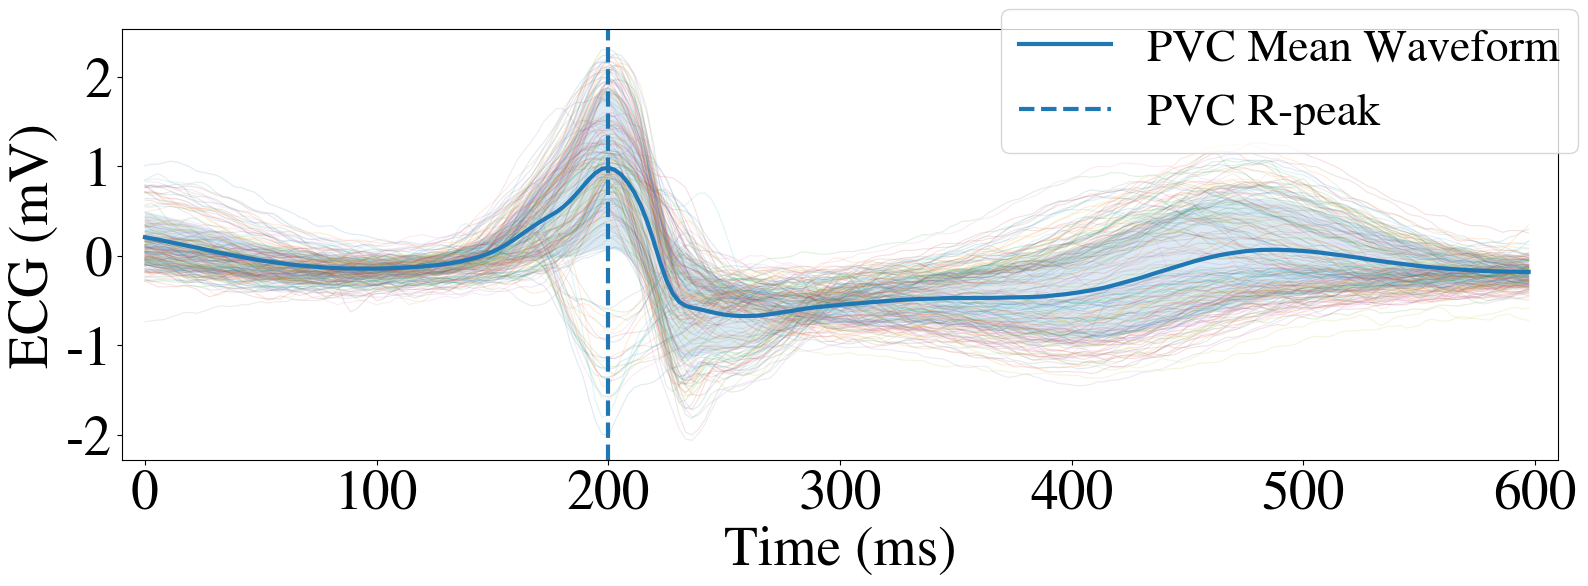

In [43]:
# --------- font size knobs (you only change these) ----------
FS_TITLE = 40
FS_LABEL = 40
FS_TICK  = 40
FS_LEGEND = 33
# -----------------------------------------------------------

fs = rec.fs
x = rec.p_signal[:, 0]   # MLII

pvc_idx = np.array([s for s, sym in zip(ann.sample, ann.symbol) if sym == 'V'])

left = int(0.2 * fs)
right = int(0.4 * fs)

valid = (pvc_idx - left >= 0) & (pvc_idx + right < len(x))
pvc_idx = pvc_idx[valid]

segs = np.stack([x[i-left:i+right] for i in pvc_idx], axis=0)
tt = (np.arange(-left, right) / fs) * 1000  # ms
tt = tt - tt.min() 

plt.figure(figsize=(16, 6))

# overlay some PVCs
plt.plot(tt, segs[:200].T, alpha=0.15, linewidth=0.8)

mu = segs.mean(axis=0)
sd = segs.std(axis=0)

plt.plot(tt, mu, linewidth=3, label="PVC Mean Waveform")
plt.fill_between(tt, mu - sd, mu + sd, alpha=0.15)

plt.axvline(200, linestyle='--', linewidth=3, label="PVC R-peak")

plt.xlabel("Time (ms)", fontsize=FS_LABEL)
plt.ylabel("ECG (mV)", fontsize=FS_LABEL)
#plt.title(f"MIT-BIH Record for PVCs",
         # fontsize=FS_TITLE)

plt.xticks(fontsize=FS_TICK)
plt.yticks(fontsize=FS_TICK)
plt.xlim(-10,610)
plt.legend(loc="upper right",bbox_to_anchor=(1.03, 1.10), fontsize=FS_LEGEND)

plt.savefig('Plot/EEG Visualization One', dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

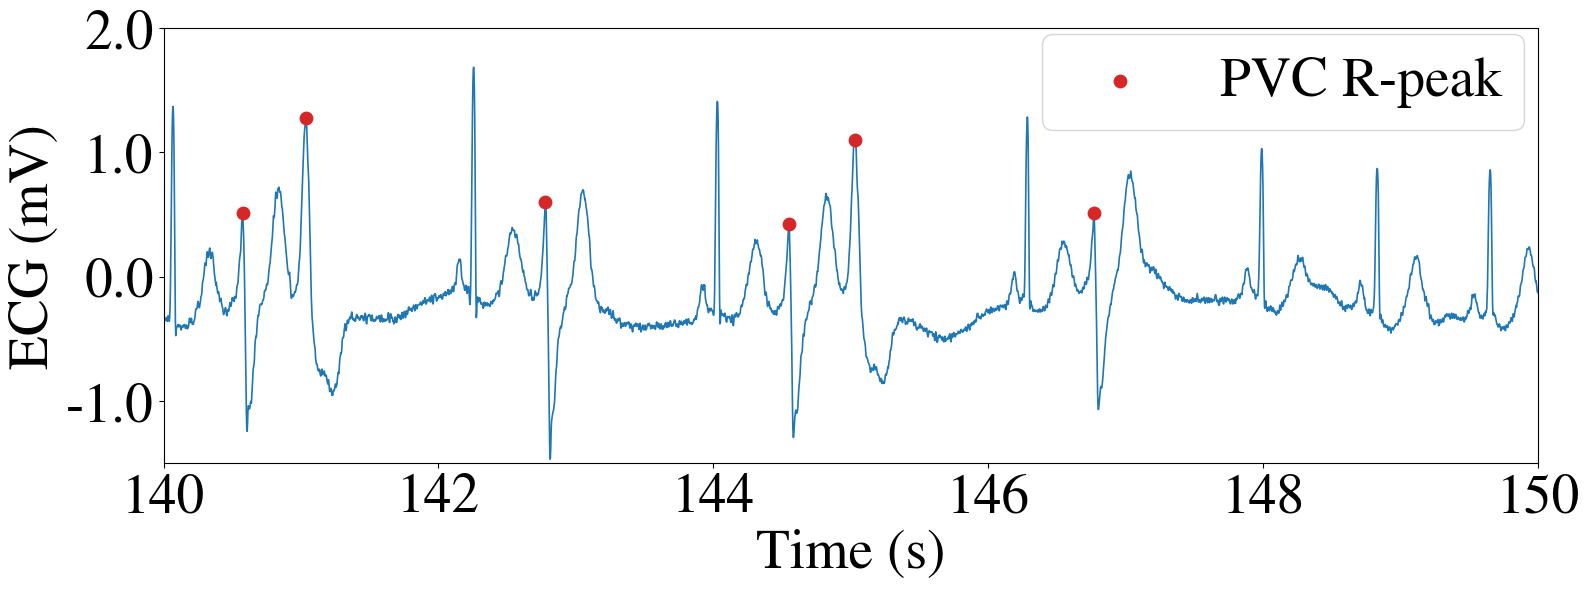

In [44]:
# --------- font size knobs (you only change these) ----------
FS_LABEL  = 40
FS_TICK   = 40
FS_LEGEND = 40
# -----------------------------------------------------------

fs = rec.fs
x = rec.p_signal[:, 0]   # MLII
t = np.arange(len(x)) / fs

# PVC indices
pvc_idx = np.array([s for s, sym in zip(ann.sample, ann.symbol) if sym == 'V'])

start_sec = 140
end_sec = 150

mask = (t >= start_sec) & (t <= end_sec)

plt.figure(figsize=(16, 6))
plt.plot(t[mask], x[mask], linewidth=1.2, color="tab:blue")

# mark PVCs
pvc_t = pvc_idx / fs
pvc_mask = (pvc_t >= start_sec) & (pvc_t <= end_sec)

plt.scatter(
    pvc_t[pvc_mask],
    x[pvc_idx[pvc_mask]],
    s=80,                 # 点也可以稍微大一点
    zorder=3,
    color="tab:red",
    label="PVC R-peak"
)

plt.xlabel("Time (s)", fontsize=FS_LABEL)
plt.ylabel("ECG (mV)", fontsize=FS_LABEL)

plt.xticks(fontsize=FS_TICK)
plt.yticks([-1.0,0,1.0,2.0],['-1.0','0.0','1.0','2.0'],fontsize=FS_TICK)

plt.ylim(-1.5,2)


plt.legend(loc="upper right",bbox_to_anchor=(1.01, 1.05), fontsize=FS_LEGEND)

plt.savefig('Plot/EEG Visualization Two', dpi=300, bbox_inches="tight")

plt.margins(x=0)
plt.tight_layout()
plt.show()
